# Model Iterations:  Model 4

In this model I want to try building another CNN from scratch and iterate with data augmentation.

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

parent_dir = '../../'

In [17]:
train_dir = parent_dir + 'data/seg_train/'
test_dir = parent_dir + 'data/seg_test/'
val_dir = parent_dir + 'data/seg_val/'

Rescale images and create data generators

In [20]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (256, 256), batch_size = 32)

validation_generator = val_datagen.flow_from_directory(val_dir, target_size = (256, 256), batch_size = 32)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [33]:
train_generator.samples

11230

In [34]:
validation_generator.samples

2804

## Build Model 4:  CNN

In [36]:
model4 = Sequential()

# input
model4.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (256, 256, 3), data_format = "channels_last"))
model4.add(MaxPooling2D((2, 2)))

# hidden layers 
model4.add(Conv2D(128, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(256, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(256, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(128, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D((2, 2)))

# flatten layer
model4.add(Flatten())

# dense hidden layer
model4.add(Dense(512, activation = 'relu'))

# output layer
model4.add(Dense(6, activation = 'softmax'))

In [37]:
# compile
model4.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

Steps per epoch and validation steps are typically the ceiling of `num_samples / batch size` which in this case is 350 and 87 respectively (I ended up aborting this because it was taking too long).  I'm sticking with 25 epochs for this model since model 3.1 showed significant overfitting at this point with this same batch size.  So I want to see if adding more layers helps with the overfitting before I try regularisation.  

In [40]:
start = datetime.datetime.now()

In [ ]:
# fit model
results4 = model4.fit_generator(train_generator, steps_per_epoch = 100, epochs = 25, 
                                validation_data = validation_generator, validation_steps = 50)

Epoch 1/25
100/100 [==============================] - 836s 8s/step - loss: 1.0768 - accuracy: 0.5716 - val_loss: 0.7147 - val_accuracy: 0.6438
Epoch 2/25
100/100 [==============================] - 829s 8s/step - loss: 0.9406 - accuracy: 0.6213 - val_loss: 0.9123 - val_accuracy: 0.6637
Epoch 3/25
100/100 [==============================] - 831s 8s/step - loss: 0.9088 - accuracy: 0.6372 - val_loss: 0.6343 - val_accuracy: 0.6719
Epoch 4/25
100/100 [==============================] - 835s 8s/step - loss: 0.8466 - accuracy: 0.6834 - val_loss: 1.1564 - val_accuracy: 0.6278
Epoch 5/25
100/100 [==============================] - 829s 8s/step - loss: 0.7708 - accuracy: 0.7031 - val_loss: 0.5692 - val_accuracy: 0.7312
Epoch 6/25
100/100 [==============================] - 3575s 36s/step - loss: 0.7003 - accuracy: 0.7330 - val_loss: 0.7788 - val_accuracy: 0.7141
Epoch 7/25
100/100 [==============================] - 893s 9s/step - loss: 0.7175 - accuracy: 0.7253 - val_loss: 0.5263 - val_accuracy: 0.77

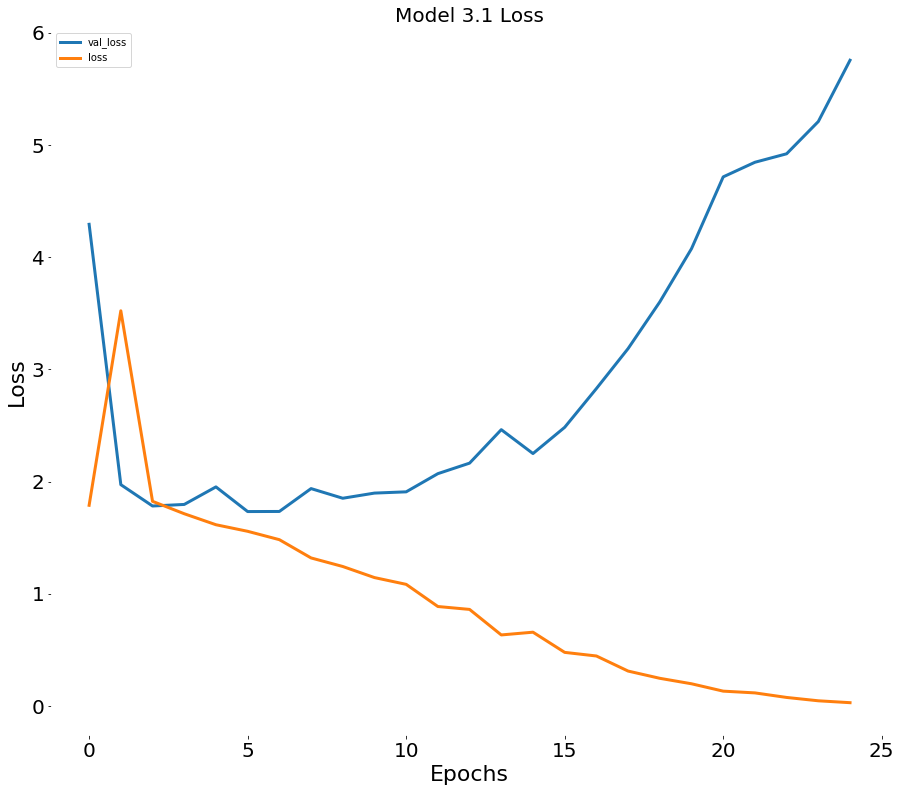

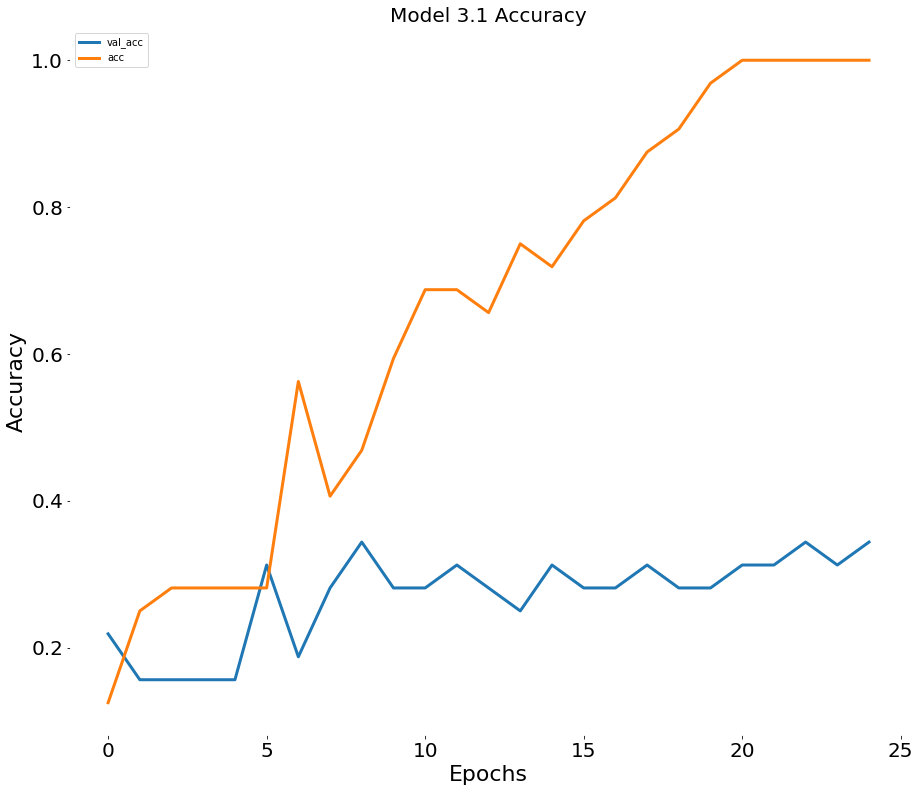

In [30]:
history = results4.history
plt.figure(figsize = (10, 8))
plt.plot(history['val_loss'], lw = 3)
plt.plot(history['loss'], lw = 3)
plt.legend(['val_loss', 'loss'])
plt.title('Model 4 Loss')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Loss', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model4_loss')
plt.show();

plt.figure(figsize = (10, 8))
plt.plot(history['val_acc'], lw = 3)
plt.plot(history['acc'], lw = 3)
plt.legend(['val_acc', 'acc'])
plt.title('Model 4 Accuracy')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Accuracy', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model4_accuracy')
plt.show();

In [ ]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

### Evaluate

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32)
test_loss, test_acc = model4.evaluate_generator(test_generator, steps=50)
print('test loss for model 4:', test_loss)
print('test acc for model 4:', test_acc)

## Model Iteration:  Model 4.1 Data Augmentation

In [ ]:
train_aug_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                       shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_aug_generator = train_aug_datagen.flow_from_directory(train_dir, target_size = (299, 299), batch_size = 32)

validation_generator = val_datagen.flow_from_directory(validation_dir, target_size=(299, 299), batch_size=32)

In [ ]:
results4_1 = model4.fit_generator(train_generator, steps_per_epoch = 100, epochs = 100 , validation_data = validation_generator, validation_steps = 50)

In [ ]:
history = results4_1.history
plt.figure(figsize = (10, 8))
plt.plot(history['val_loss'], lw = 3)
plt.plot(history['loss'], lw = 3)
plt.legend(['val_loss', 'loss'])
plt.title('Model 4.1 Loss')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Loss', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model4_1_loss')
plt.show();

plt.figure(figsize = (10, 8))
plt.plot(history['val_acc'], lw = 3)
plt.plot(history['acc'], lw = 3)
plt.legend(['val_acc', 'acc'])
plt.title('Model 4.1 Accuracy')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Accuracy', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model4_1_accuracy')
plt.show();

In [ ]:
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))

## Final Evaluation

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(299, 299), batch_size=32)
test_loss, test_acc = model4_1.evaluate_generator(test_generator, steps=50)
print('test loss for model 4.1:', test_loss)
print('test acc for model 4.1:', test_acc)

In [ ]:
end = datetime.datetime.now()
elapsed = end - original_start
print('Entire notebook took a total of:\n {}'.format(elapsed))